### Case Study 1 : Retail Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_cust=pd.read_csv('F:/analytix_labs/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
df_prod_cat_info=pd.read_csv('F:/analytix_labs/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')
df_trxs=pd.read_csv('F:/analytix_labs/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')

In [14]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
customer_Id    5647 non-null int64
DOB            5647 non-null object
Gender         5645 non-null object
city_code      5645 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [6]:
df_prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [45]:
df_trxs.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
df_cust_trxs=pd.merge(df_cust,df_trxs,left_on ='customer_Id' , right_on ='cust_id' , how ='inner',suffixes=('_CUST', '_TRXS') )

In [4]:
df_cust_trxs

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [5]:
Customer_Final=pd.merge(df_cust_trxs,df_prod_cat_info,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code',],how='inner',suffixes=('_TRXS', '_PCI'))

### 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [6]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
customer_Id          23053 non-null int64
DOB                  23053 non-null object
Gender               23044 non-null object
city_code            23045 non-null float64
transaction_id       23053 non-null int64
cust_id              23053 non-null int64
tran_date            23053 non-null object
prod_subcat_code     23053 non-null int64
prod_cat_code        23053 non-null int64
Qty                  23053 non-null int64
Rate                 23053 non-null int64
Tax                  23053 non-null float64
total_amt            23053 non-null float64
Store_type           23053 non-null object
prod_cat             23053 non-null object
prod_sub_cat_code    23053 non-null int64
prod_subcat          23053 non-null object
dtypes: float64(3), int64(8), object(6)
memory usage: 3.2+ MB


### b. Top/Bottom 10 observations

In [7]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [8]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,268914,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,269519,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,273524,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,272141,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,272141,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [6]:
Customer_Final[['Qty','Rate','Tax','total_amt']].describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


### d. Frequency tables for all the categorical variables

In [7]:
df_cat=Customer_Final.loc[:,Customer_Final.columns.difference(['Qty','Rate','Tax','total_amt'])]

In [10]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 13 columns):
DOB                  23053 non-null object
Gender               23044 non-null object
Store_type           23053 non-null object
city_code            23045 non-null float64
cust_id              23053 non-null int64
customer_Id          23053 non-null int64
prod_cat             23053 non-null object
prod_cat_code        23053 non-null int64
prod_sub_cat_code    23053 non-null int64
prod_subcat          23053 non-null object
prod_subcat_code     23053 non-null int64
tran_date            23053 non-null object
transaction_id       23053 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 2.5+ MB


In [85]:
def freq_cnt(x):
    return print(x.value_counts())

In [120]:
df_cat.apply(lambda x : freq_cnt(x))

27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
09-06-1970    24
              ..
20-07-1980     1
03-10-1972     1
22-01-1986     1
27-04-1982     1
29-05-1975     1
Name: DOB, Length: 3987, dtype: int64
M    11811
F    11233
Name: Gender, dtype: int64
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: city_code, dtype: int64
269449    13
268819    13
269245    12
273014    12
272415    12
          ..
271221     1
266803     1
266804     1
266805     1
266941     1
Name: cust_id, Length: 5506, dtype: int64
269449    13
268819    13
269245    12
273014    12
272415    12
          ..
271221     1
266803     1
266804     1
266805     1
266941     1
Name: customer_Id, Length: 5506, dtype: int64
Books               6069
Electronics         4898
Home and kitchen   

DOB                  None
Gender               None
Store_type           None
city_code            None
cust_id              None
customer_Id          None
prod_cat             None
prod_cat_code        None
prod_sub_cat_code    None
prod_subcat          None
prod_subcat_code     None
tran_date            None
transaction_id       None
dtype: object

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [8]:
df_cont=Customer_Final[['Qty','Rate','Tax','total_amt']]

In [9]:
def fn_hist(x):
    plt.figure(figsize = (5, 3))
    plt.xlabel(x.name)
    plt.hist(x)
    plt.show()
    return

In [10]:
def fn_bar(x):
    plt.figure(figsize = (5, 3))
    plt.xlabel(x.name)
    #plt.bar(x.value_counts())
    x.value_counts().plot(kind='bar')
    return

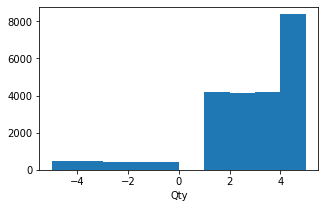

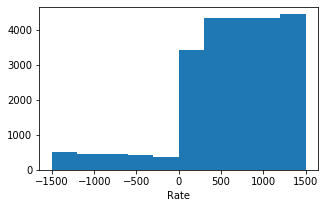

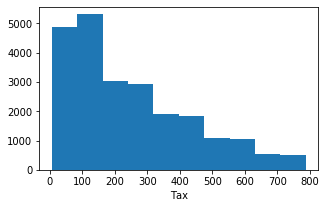

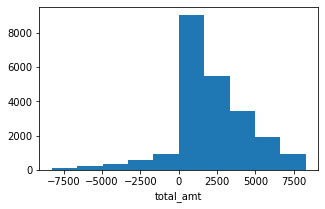

Qty          None
Rate         None
Tax          None
total_amt    None
dtype: object

In [114]:
df_cont.apply(lambda x : fn_hist(x))

DOB                  None
Gender               None
Store_type           None
city_code            None
cust_id              None
customer_Id          None
prod_cat             None
prod_cat_code        None
prod_sub_cat_code    None
prod_subcat          None
prod_subcat_code     None
tran_date            None
transaction_id       None
dtype: object

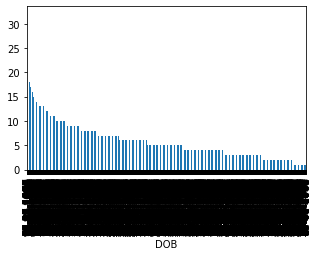

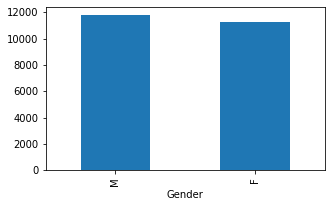

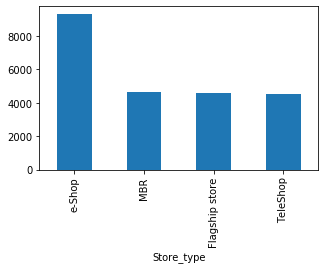

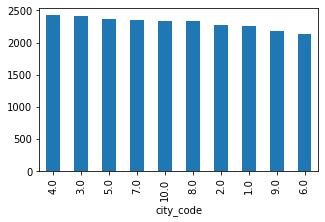

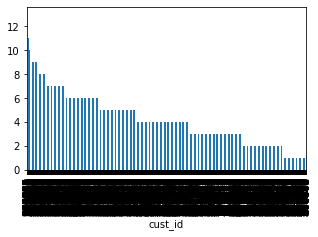

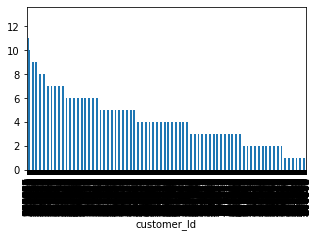

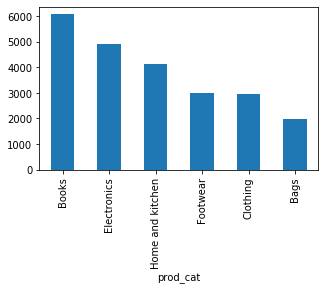

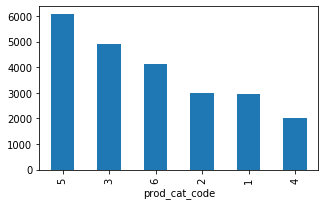

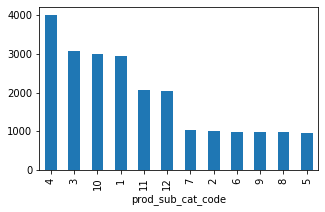

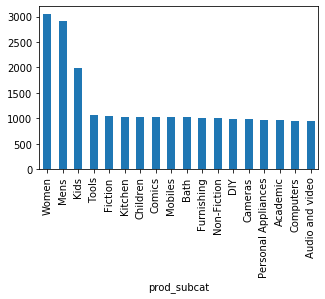

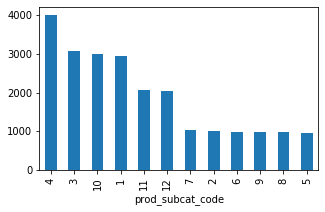

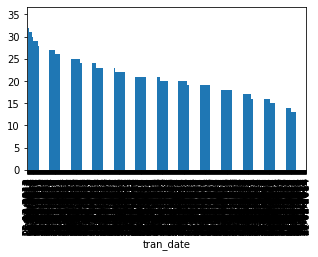

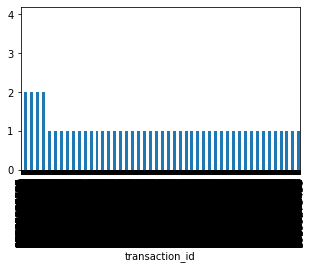

In [128]:
df_cat.apply(lambda x : fn_bar(x))

### 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [11]:
df_date=Customer_Final.tran_date.str.split('/|-', n = 3, expand = True)

In [12]:
df_date=df_date.rename(columns={0:'Dy',1:'Mn',2:'Yr'})

In [13]:
df_date['Date']=df_date.Dy+'-'+df_date.Mn+'-'+df_date.Yr

In [14]:
df_date.Date=pd.to_datetime(df_date.Date,format='%d-%m-%Y')

In [15]:
Customer_Final.tran_date=df_date.Date

In [16]:
Customer_Final=Customer_Final.sort_values(by='tran_date')

In [17]:
(Customer_Final.tran_date[0]-Customer_Final.tran_date[Customer_Final.shape[0]-1]).days

1083

### b. Count of transactions where the total amount of transaction was negative

In [18]:
Customer_Final.transaction_id[(Customer_Final.total_amt <0) ].count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [19]:
df_mfpop=df_cust_trxs.pivot_table(index = 'prod_cat_code', columns = 'Gender', values = 'customer_Id', aggfunc = 'count')

In [20]:
df_mfpop=df_mfpop.loc[(df_mfpop['F']>df_mfpop['M'])]

In [21]:
df_mfpop

Gender,F,M
prod_cat_code,,
2,1529,1469


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [22]:
df_City_Per=(df_cust_trxs.groupby('city_code').customer_Id.count()/df_cust_trxs.city_code.count() *100).round().reset_index()

In [23]:
df_City_Per=df_City_Per.rename(columns={'customer_Id':'City_Per'})

In [24]:
df_City_Per.loc[(df_City_Per.City_Per == df_City_Per.City_Per.max())]

,city_code,City_Per
3,4.0,11.0


### 7. Which store type sells the maximum products by value and by quantity?

In [25]:
df_trxs_p=df_trxs.loc[(df_trxs.Qty> 0) |(df_trxs.Rate>0) |(df_trxs.total_amt> 0) ]

In [26]:
df_max=df_trxs_p.groupby(['Store_type'])['Qty','total_amt'].sum().reset_index()

In [27]:
df_max.loc[(df_max.Qty==df_max.Qty.max()) & (df_max.total_amt==df_max.total_amt.max())]

,Store_type,Qty,total_amt
3,e-Shop,25435,2.218561e+07


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [29]:
df_tot_amt=Customer_Final.loc[(Customer_Final.Store_type =='Flagship store') & ((Customer_Final.prod_cat =='Electronics')|(Customer_Final.prod_cat =='Clothing'))]

In [30]:
df_tot_amt.pivot_table(index = 'Store_type', columns = 'prod_cat', values = 'total_amt', aggfunc = 'sum')

prod_cat,Clothing,Electronics
Store_type,,
Flagship store,1194423.23,2215136.04


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [31]:
df_tot_male=Customer_Final.loc[(Customer_Final.prod_cat =='Electronics')&(Customer_Final.Gender =='M')]

In [32]:
df_tot_male.pivot_table(index = 'prod_cat', columns = 'Gender', values = 'total_amt', aggfunc = 'sum')

Gender,M
prod_cat,
Electronics,5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [33]:
df_cust_ten=Customer_Final.loc[(Customer_Final.total_amt > 0) ]

In [34]:
df_ten=df_cust_ten.groupby('customer_Id').transaction_id.count().reset_index()

In [35]:
df_ten.loc[df_ten.transaction_id > 10 ].count()

customer_Id       6
transaction_id    6
dtype: int64

### 11. For all customers aged between 25 - 35, find out


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [36]:
from datetime import datetime as dt

In [37]:
df_DOB=Customer_Final.DOB.str.split('-', n = 3, expand = True)

In [38]:
df_DOB=df_DOB.rename(columns={0:'Dy',1:'Mn',2:'Yr'})

In [39]:
df_DOB.Yr=df_DOB.Yr.astype('int64')

In [40]:
df_DOB['Age']= dt.now().year-df_DOB.Yr

In [41]:
Customer_Final['Age']=df_DOB.Age

In [42]:
df_tot_rng=Customer_Final.loc[((Customer_Final.prod_cat =='Electronics') | (Customer_Final.prod_cat =='Books')) & ((Customer_Final.Age >= 25) & (Customer_Final.Age <= 35))]

In [43]:
df_tot_rng.total_amt.sum().round(2)

8162276.98

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [44]:
df_tot_rng.loc[(df_tot_rng.tran_date >= '2014-01-01') & (df_tot_rng.tran_date <= '2014-03-01')].total_amt.sum().round(2)

366454.47

In [47]:
df_tot_rng.Age.value_counts()

33    539
31    531
28    522
35    515
32    472
34    444
30    443
29    418
Name: Age, dtype: int64